<a href="https://colab.research.google.com/github/asarria48/Nuclear-physics/blob/main/Informe2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación
Muestre los 6 espectros simultáneamente

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
/tmp/ipython-input-249265116.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a fut

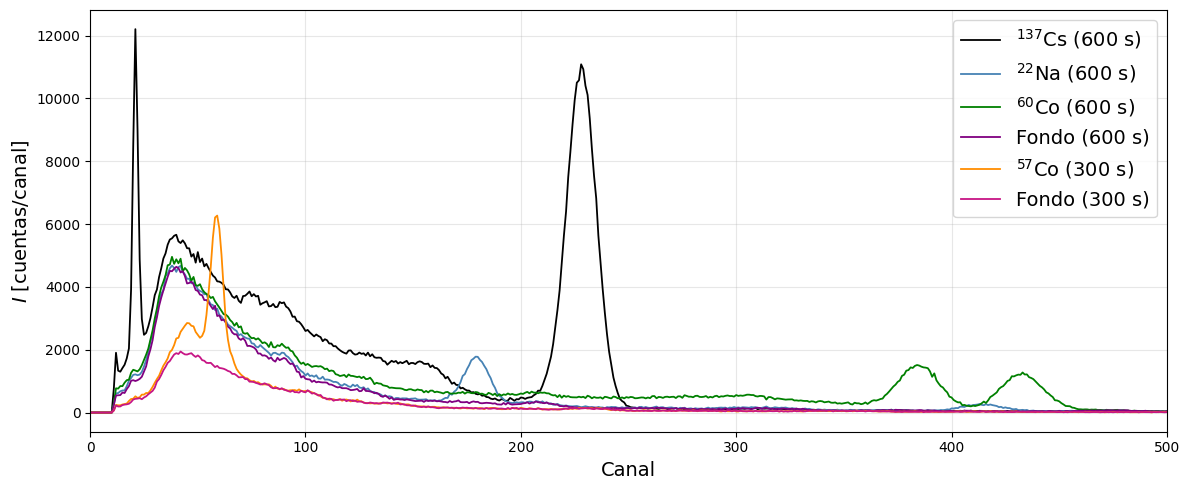

In [19]:
# Lista de archivos .dat
archivos = [
    "NaI_137Cs_600s.dat",
    "NaI_22Na_600s.dat",
    "NaI_60Co_600s.dat",
    "NaI_Fondo_600s.dat",
    "NaI_57Co_300s.dat",
    "NaI_Fondo_300s.dat"
]

colores = ['black', 'steelblue', 'green', 'purple', 'darkorange', 'mediumvioletred']
etiquetas = ['$^{137}$Cs (600 s)', '$^{22}$Na (600 s)', '$^{60}$Co (600 s)', 'Fondo (600 s)', '$^{57}$Co (300 s)', 'Fondo (300 s)']

plt.figure(figsize=(12, 5))

def leer_datos(ruta):
    try:
        df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=0)    # para los títulos de las columnas
        cols = df.columns[:2]
        df = df.rename(columns={cols[0]: 'canal', cols[1]: 'cuentas'})
        df['canal'] = pd.to_numeric(df['canal'], errors='coerce')
        df['cuentas'] = pd.to_numeric(df['cuentas'], errors='coerce')
        df = df.dropna(subset=['canal', 'cuentas']).reset_index(drop=True)
        return df[['canal', 'cuentas']]
    except Exception:                                                           # en caso de no tener los títulos
        df = pd.read_csv(ruta, delim_whitespace=True, comment='#', header=None)
        df = df.iloc[:, :2]                                                     # tomo solo las dos primeras columnas
        df.columns = ['canal', 'cuentas']
        df['canal'] = pd.to_numeric(df['canal'], errors='coerce')
        df['cuentas'] = pd.to_numeric(df['cuentas'], errors='coerce')
        df = df.dropna(subset=['canal', 'cuentas']).reset_index(drop=True)
        return df[['canal', 'cuentas']]

for archivo, color, etiqueta in zip(archivos, colores, etiquetas):
    if not os.path.exists(archivo):
        print(f"No se encontró el archivo {archivo}, se saltará.")
        continue
    data = leer_datos(archivo)
    x = data['canal'].values
    y = data['cuentas'].values
    plt.plot(x, y, lw=1.3, color=color, label=etiqueta)

plt.xlabel("Canal", fontsize=14)
plt.xlim(0, 500)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


Reste el fondo correspondiente a cada espectro

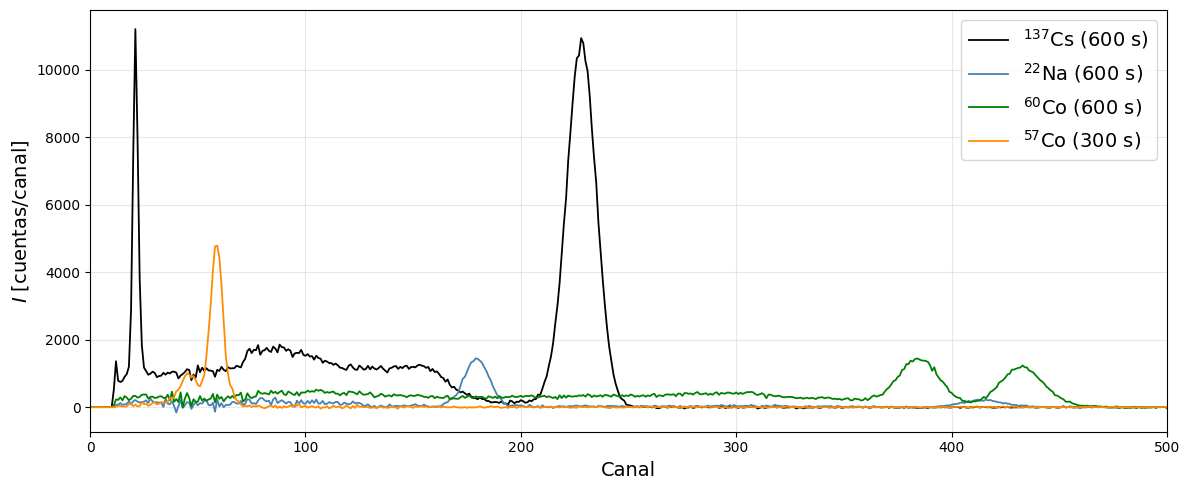

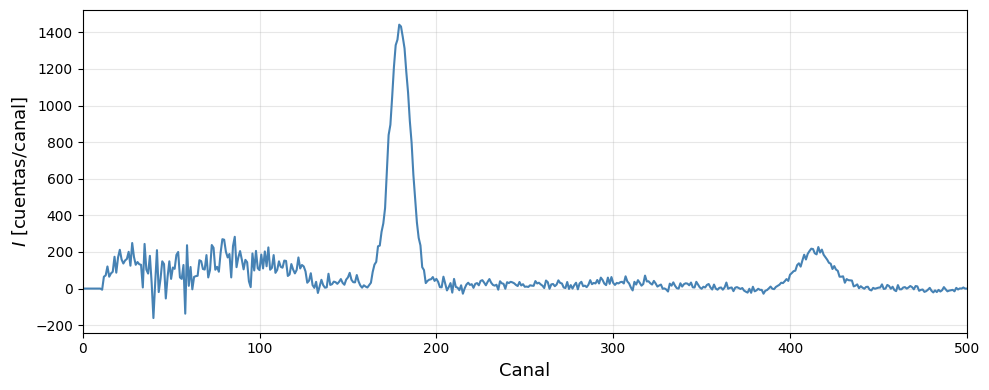

In [34]:
archivos = [
    "NaI_137Cs_600s.dat",
    "NaI_22Na_600s.dat",
    "NaI_60Co_600s.dat",
    "NaI_57Co_300s.dat",
    "NaI_Fondo_600s.dat",
    "NaI_Fondo_300s.dat"
]

colores = ['black', 'steelblue', 'green', 'darkorange', 'gray', 'gray']
etiquetas = ['$^{137}$Cs (600 s)', '$^{22}$Na (600 s)', '$^{60}$Co (600 s)', '$^{57}$Co (300 s)', 'Fondo (600 s)', 'Fondo (300 s)']

def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

# los fondos
fondo_600 = leer_dat("NaI_Fondo_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_300s.dat")

plt.figure(figsize=(12, 5))


for archivo, color, etiqueta in zip(archivos, colores, etiquetas):
    if "Fondo" in archivo:                                                      # ya no grafico los fondos. Además, distingo espectros de fondos
        continue

    data = leer_dat(archivo)
    x = data['canal'].values
    y = data['cuentas'].astype(float).values


    if "600s" in archivo:                                                       # si el espectro es de 600 segundos
        y_fondo = np.interp(x, fondo_600['canal'], fondo_600['cuentas'])
        y -= y_fondo                                                            # le resto el respectivo fondo de 600 segundos
    elif "300s" in archivo:                                                     # si el espectro es de 300 segundos
        y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
        y -= y_fondo                                                            # le resto el respectivo fondo de 300 segundos

    plt.plot(x, y, lw=1.3, color=color, label=etiqueta)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


data_na22 = leer_dat("NaI_22Na_600s.dat")                                       # como la intensidad es tan baja, conviene más mostrarla por separado
x = data_na22['canal'].values
y = data_na22['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_600['canal'], fondo_600['cuentas'])
y -= y_fondo

plt.figure(figsize=(10, 4))
plt.plot(x, y, color='steelblue', lw=1.5)
plt.xlabel("Canal", fontsize=13)
plt.ylabel("$I$ [cuentas/canal]", fontsize=13)
plt.xlim(0, 500)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Haga una gráfica que muestre simultáneamente el espectro del 57Co, el fondo, y la resta obtenida

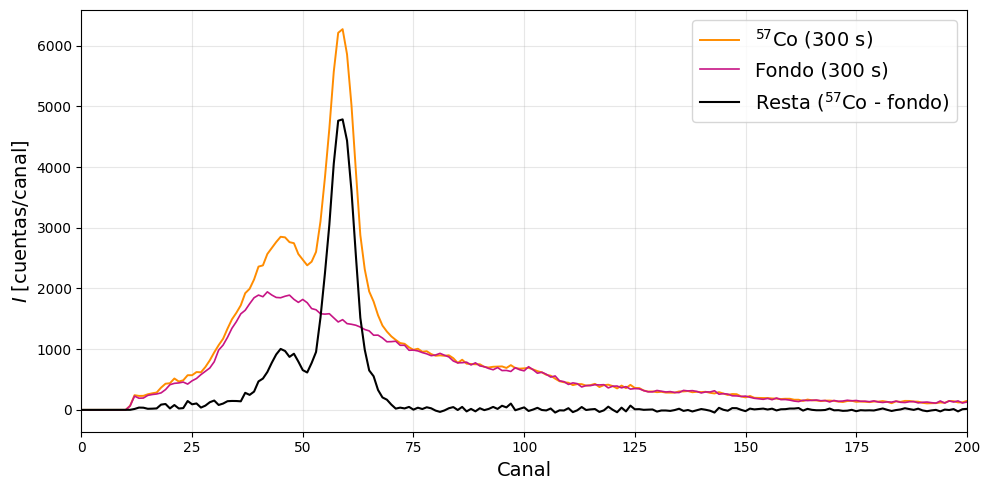

In [41]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_57Co_300s.dat")
fondo_300 = leer_dat("NaI_Fondo_300s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
y_resta = y_co57 - y_fondo


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{57}$Co (300 s)", color='darkorange', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (300 s)", color='mediumvioletred', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{57}$Co - fondo)", color='black', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 200)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Haga una gráfica "resta" para un espectro con tiempo de adquisición de 600 segundos.

Elijo el Cesio-137

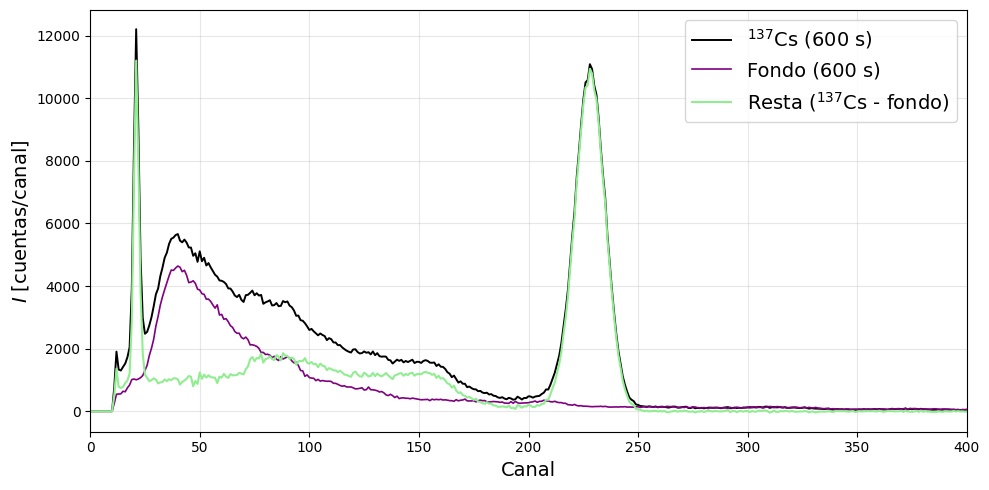

In [44]:
def leer_dat(archivo):
    with open(archivo, 'r', encoding='latin-1') as f:
        lineas = f.readlines()
    lineas_numericas = [l for l in lineas if l.strip() and l.strip()[0].isdigit()]
    from io import StringIO
    data = pd.read_csv(StringIO(''.join(lineas_numericas)), sep=r'\s+', header=None)
    data.columns = ['canal', 'cuentas']
    return data

co57 = leer_dat("NaI_137Cs_600s.dat")
fondo_300 = leer_dat("NaI_Fondo_600s.dat")

x = co57['canal'].values
y_co57 = co57['cuentas'].astype(float).values
y_fondo = np.interp(x, fondo_300['canal'], fondo_300['cuentas'])
y_resta = y_co57 - y_fondo


plt.figure(figsize=(10, 5))
plt.plot(x, y_co57, label="$^{137}$Cs (600 s)", color='black', lw=1.4)
plt.plot(x, y_fondo, label="Fondo (600 s)", color='purple', lw=1.2)
plt.plot(x, y_resta, label="Resta ($^{137}$Cs - fondo)", color='lightgreen', lw=1.5)

plt.xlabel("Canal", fontsize=14)
plt.ylabel("$I$ [cuentas/canal]", fontsize=14)
plt.legend(fontsize=14)
plt.xlim(0, 400)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
